In [2]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2020-10-18 11:12:50--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19_casus_landelijk.csv’ not modified on server. Omitting download.



In [3]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [4]:
df = pd.read_csv('COVID-19_casus_landelijk.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0      2020-10-17 10:00:00      2020-01-01                  DOO    40-49   
1      2020-10-17 10:00:00      2020-01-20                  DOO    50-59   
2      2020-10-17 10:00:00      2020-01-29                  DOO    80-89   
3      2020-10-17 10:00:00      2020-01-31                  DOO    80-89   
4      2020-10-17 10:00:00      2020-01-31                  DOO      90+   
...                    ...             ...                  ...      ...   
220047 2020-10-17 10:00:00      2020-10-17                  DON    30-39   
220048 2020-10-17 10:00:00      2020-10-17                  DPL    60-69   
220049 2020-10-17 10:00:00      2020-10-17                  DON    60-69   
220050 2020-10-17 10:00:00      2020-10-17                  DPL    40-49   
220051 2020-10-17 10:00:00      2020-10-17                  DON    40-49   

           Sex       Province Hospital_admission Deceased  Week_of_death  \
0       Female  Noord-Holland                 No       No            NaN   
1       Female     Gelderland                 No       No            NaN   
2         Male     Overijssel                 No       No            NaN   
3         Male  Noord-Brabant                Yes      Yes       202015.0   
4       Female  Noord-Holland                 No       No            NaN   
...        ...            ...                ...      ...            ...   
220047  Female     Gelderland            Unknown  Unknown            NaN   
220048    Male        Utrecht            Unknown  Unknown            NaN   
220049  Female   Zuid-Holland            Unknown  Unknown            NaN   
220050    Male     Overijssel            Unknown       No            NaN   
220051    Male   Zuid-Holland            Unknown  Unknown            NaN   

       Municipal_health_service  
0                 GGD Amsterdam  
1           GGD Gelderland-Zuid  
2              GGD Regio Twente  
3        GGD Brabant Zuid-Oost   
4                 GGD Amsterdam  
...                         ...  
220047    GGD Gelderland-Midden  
220048        GGD regio Utrecht  
220049   GGD Rotterdam Rijnmond  
220050           GGD IJsselland  
220051      GGD Hollands Midden  

[220052 rows x 10 columns]

In [5]:
df.count()

Date_file                   220052
Date_statistics             220052
Date_statistics_type        220052
Agegroup                    220052
Sex                         220052
Province                    220052
Hospital_admission          220045
Deceased                    220052
Week_of_death                 6731
Municipal_health_service    220052
dtype: int64

In [6]:
daterep = 'Date_statistics'
region  = 'Agegroup'
cases   = 'cases'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('7 days')

df[cases]  = 1
df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0      2020-10-17 10:00:00      2020-01-01                  DOO    40-49   
1      2020-10-17 10:00:00      2020-01-20                  DOO    50-59   
2      2020-10-17 10:00:00      2020-01-29                  DOO    80-89   
3      2020-10-17 10:00:00      2020-01-31                  DOO    80-89   
4      2020-10-17 10:00:00      2020-01-31                  DOO      90+   
...                    ...             ...                  ...      ...   
220047 2020-10-17 10:00:00      2020-10-17                  DON    30-39   
220048 2020-10-17 10:00:00      2020-10-17                  DPL    60-69   
220049 2020-10-17 10:00:00      2020-10-17                  DON    60-69   
220050 2020-10-17 10:00:00      2020-10-17                  DPL    40-49   
220051 2020-10-17 10:00:00      2020-10-17                  DON    40-49   

           Sex       Province Hospital_admission  Deceased  Week_of_death  \
0       Female  Noord-Holland                 No         0            NaN   
1       Female     Gelderland                 No         0            NaN   
2         Male     Overijssel                 No         0            NaN   
3         Male  Noord-Brabant                Yes         1       202015.0   
4       Female  Noord-Holland                 No         0            NaN   
...        ...            ...                ...       ...            ...   
220047  Female     Gelderland            Unknown         0            NaN   
220048    Male        Utrecht            Unknown         0            NaN   
220049  Female   Zuid-Holland            Unknown         0            NaN   
220050    Male     Overijssel            Unknown         0            NaN   
220051    Male   Zuid-Holland            Unknown         0            NaN   

       Municipal_health_service  cases  
0                 GGD Amsterdam      1  
1           GGD Gelderland-Zuid      1  
2              GGD Regio Twente      1  
3        GGD Brabant Zuid-Oost       1  
4                 GGD Amsterdam      1  
...                         ...    ...  
220047    GGD Gelderland-Midden      1  
220048        GGD regio Utrecht      1  
220049   GGD Rotterdam Rijnmond      1  
220050           GGD IJsselland      1  
220051      GGD Hollands Midden      1  

[220052 rows x 11 columns]

In [7]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo['cases']

Agegroup          0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  \
Date_statistics                                                                 
2020-01-01        0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
2020-01-20        0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
2020-01-29        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2020-01-31        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2020-02-01        0.0    0.0    0.0    0.0    0.0    1.0    2.0    0.0    0.0   
...               ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-10-13       23.0  313.0  621.0  460.0  497.0  512.0  282.0  165.0  124.0   
2020-10-14       14.0  254.0  578.0  380.0  385.0  430.0  257.0  168.0  105.0   
2020-10-15       17.0  271.0  416.0  327.0  339.0  363.0  203.0  145.0   89.0   
2020-10-16       14.0  167.0  350.0  257.0  274.0  295.0  169.0  102.0   80.0   
2020-10-17        3.0   17.0   33.0   24.0   28.0   18.0   19.0   13.0    1.0   

Agegroup          90+  <50  Unknown  
Date_statistics                      
2020-01-01        0.0  0.0      0.0  
2020-01-20        0.0  0.0      0.0  
2020-01-29        0.0  0.0      0.0  
2020-01-31        1.0  0.0      0.0  
2020-02-01        0.0  0.0      0.0  
...               ...  ...      ...  
2020-10-13       43.0  0.0      5.0  
2020-10-14       38.0  0.0      3.0  
2020-10-15       37.0  0.0      0.0  
2020-10-16       38.0  0.0      1.0  
2020-10-17        0.0  0.0      0.0  

[259 rows x 12 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [8]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                                       ...  \
Agegroup        0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  ...   
2020-01-01      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-02      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-03      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-04      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-05      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
2021-10-13      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2021-10-14      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2021-10-15      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2021-10-16      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2021-10-17      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   

           cases                                                        
Agegroup   20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  <50 Unknown  
2020-01-01   0.0   0.0   1.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0  
2020-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
...          ...   ...   ...   ...   ...   ...   ...  ...  ...     ...  
2021-10-13   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2021-10-14   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2021-10-15   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2021-10-16   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2021-10-17   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  

[656 rows x 24 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [9]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    656.000000
mean     327.500000
std      189.515171
min        0.000000
25%      163.750000
50%      327.500000
75%      491.250000
max      655.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [10]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [11]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for '0-9'
Minimum number of cases is 2
Wave 01 beta 12.253 mu  86 fit 0.863 peak 2020-03-27 from 2020-03-13 to 2020-04-20 size 98
Wave 02 beta 15.745 mu 151 fit 0.887 peak 2020-05-31 from 2020-05-12 to 2020-07-02 size 131
Wave 03 beta  5.564 mu 164 fit 0.825 peak 2020-06-13 from 2020-06-07 to 2020-06-25 size 43
Wave 04 beta 14.460 mu 220 fit 0.843 peak 2020-08-08 from 2020-07-18 to 2020-09-17 size 249
Wave 05 beta 12.941 mu 259 fit 0.861 peak 2020-09-16 from 2020-08-26 to 2020-11-04 size 550
Wave 06 beta  6.109 mu 279 fit 0.939 peak 2020-10-06 from 2020-09-26 to 2020-10-27 size 197
--- no data for wave
Running multiple wave analysis for '10-19'
Minimum number of cases is 2
Wave 01 beta  6.225 mu  65 fit 0.785 peak 2020-03-06 from 2020-02-27 to 2020-03-21 size 75
Wave 02 beta  5.846 mu  82 fit 0.877 peak 2020-03-23 from 2020-03-16 to 2020-04-05 size 55
Wave 03 beta  6.970 mu  95 fit 0.831 peak 2020-04-05 from 2020-03-26 to 2020-04-29 size 204
Wave 04 beta 

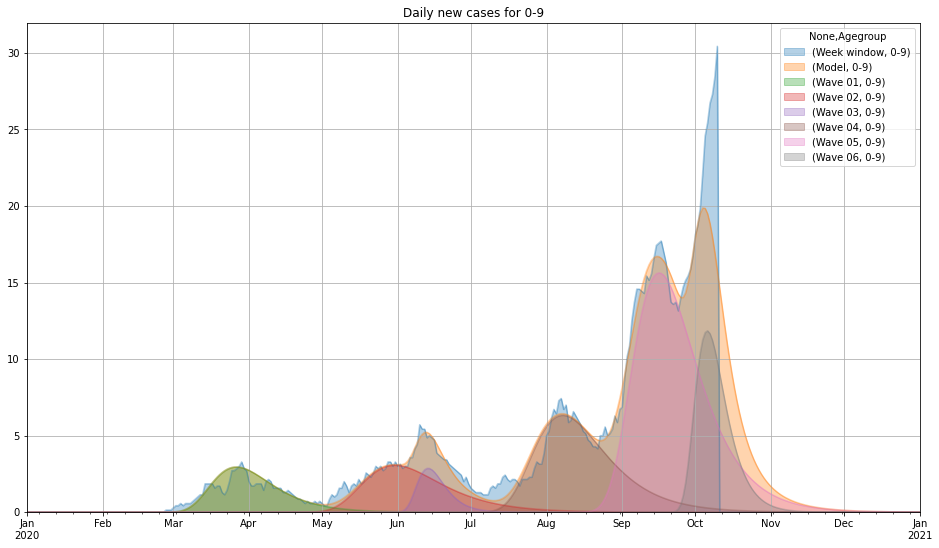

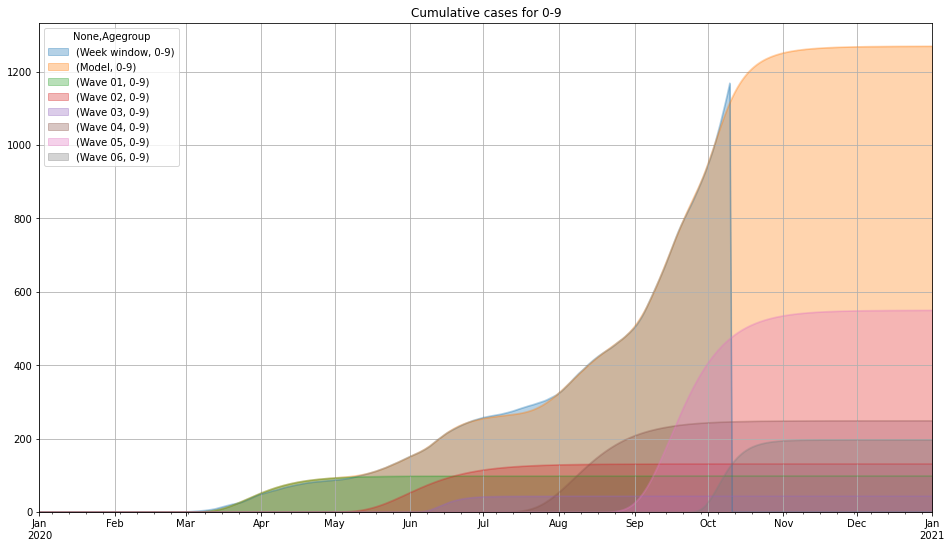

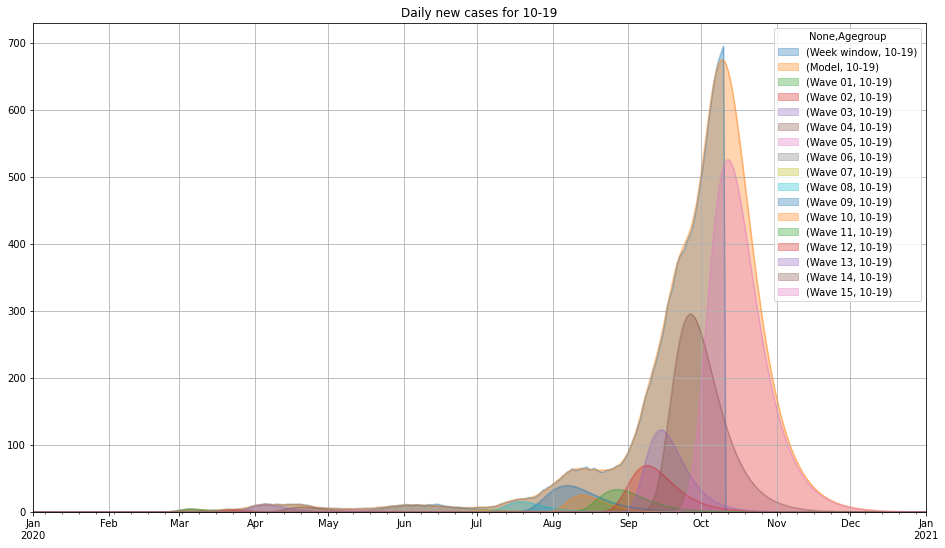

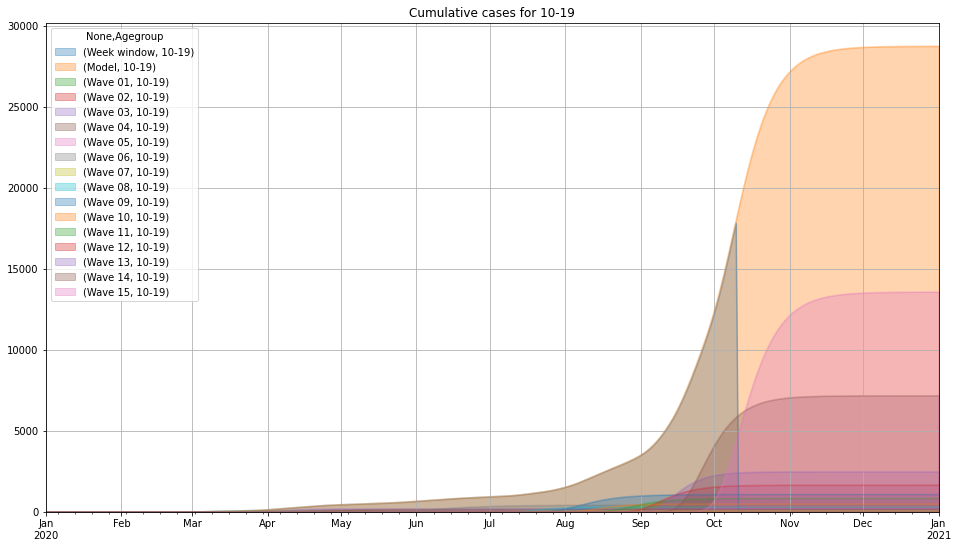

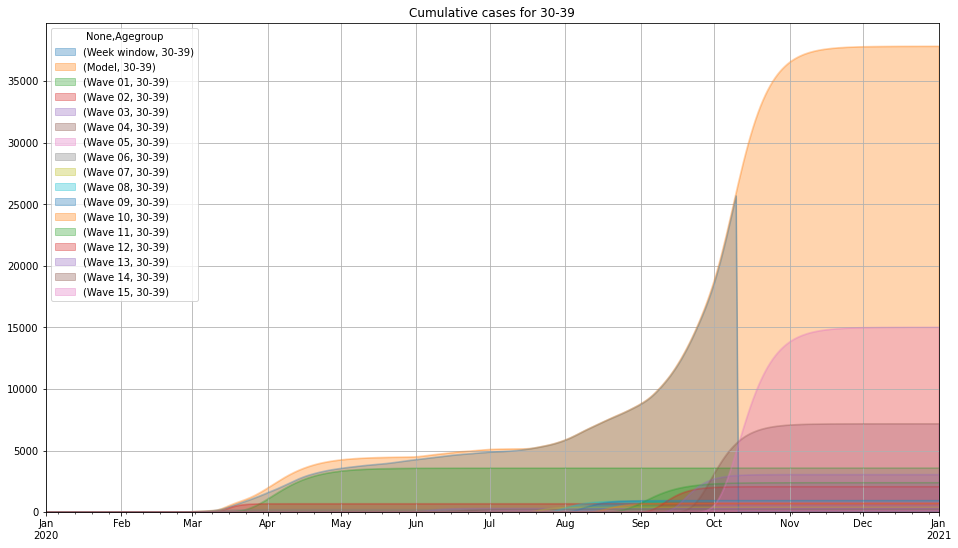

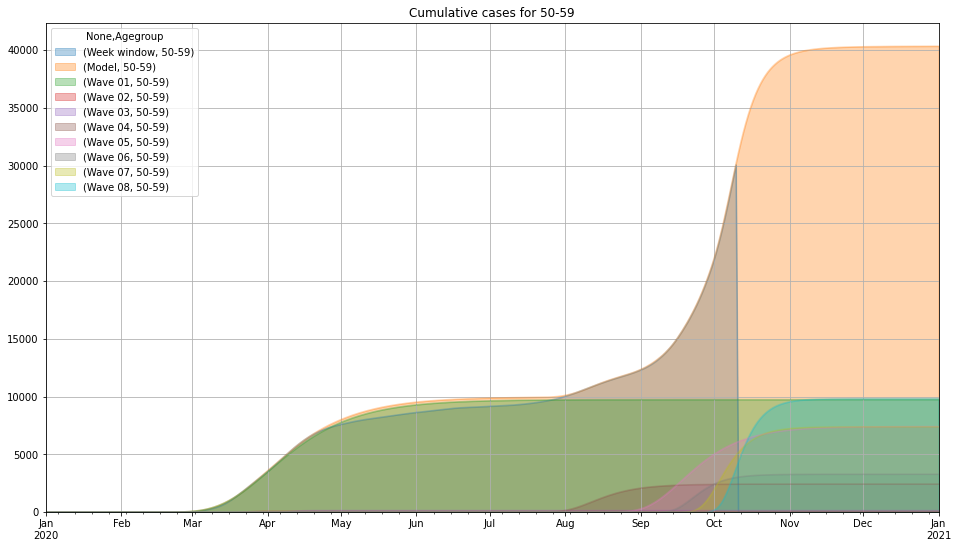

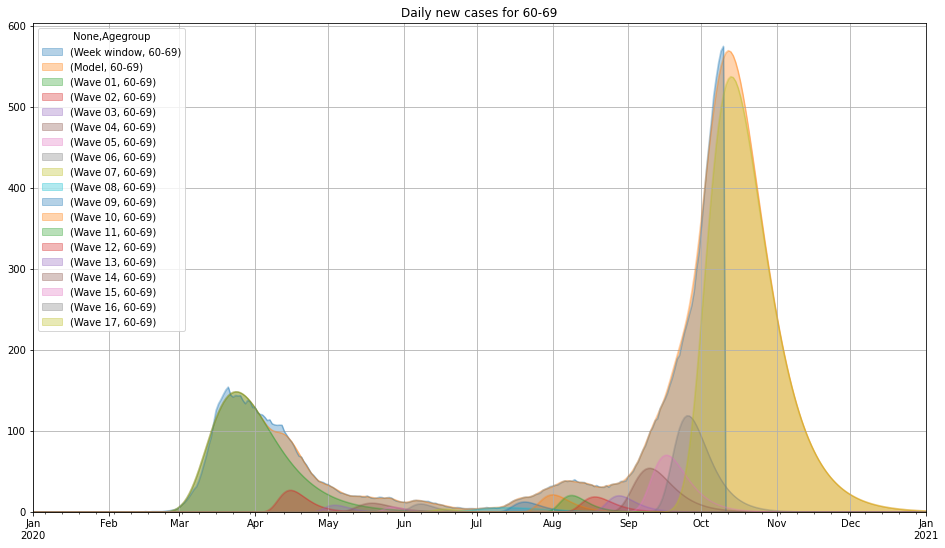

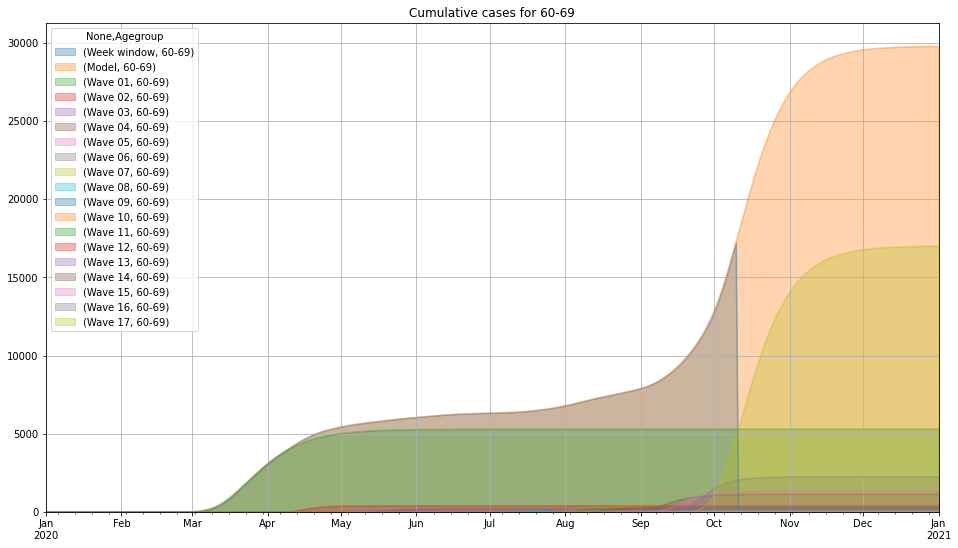

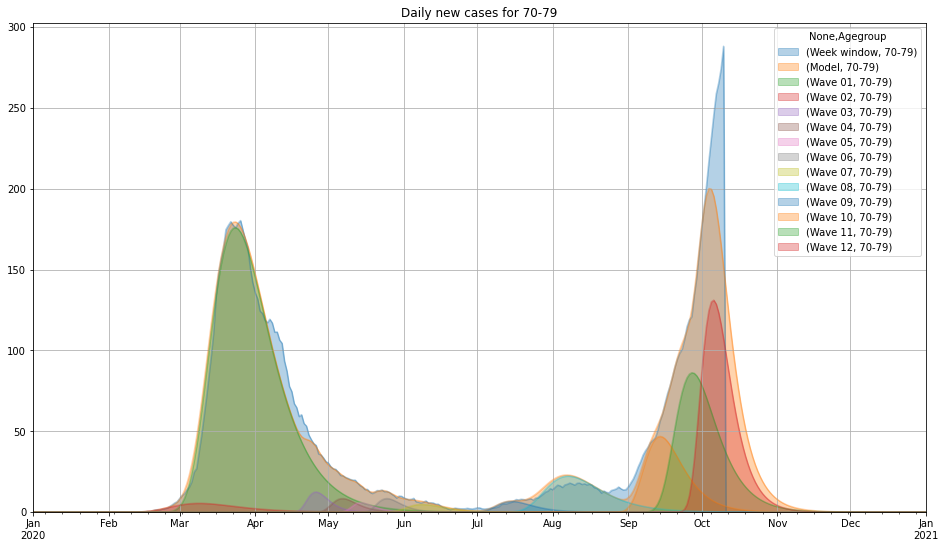

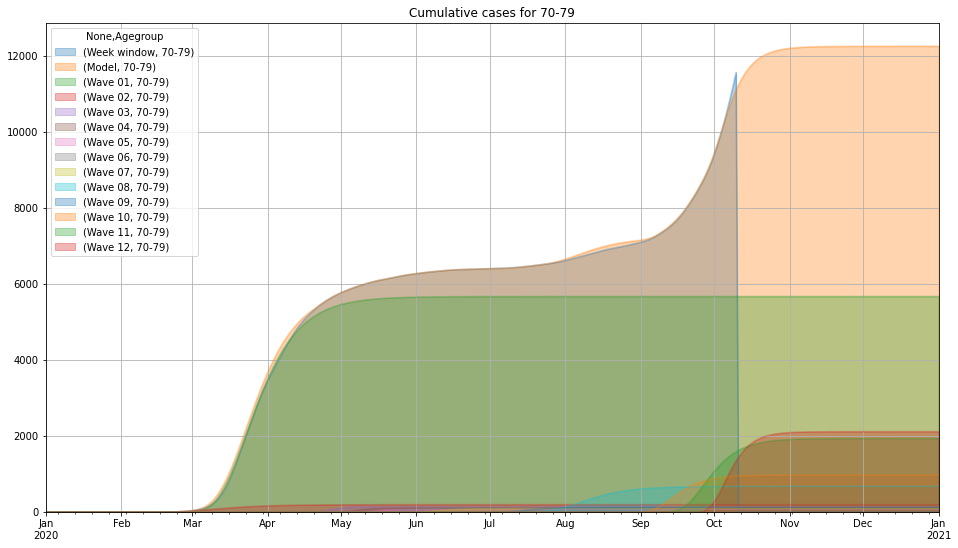

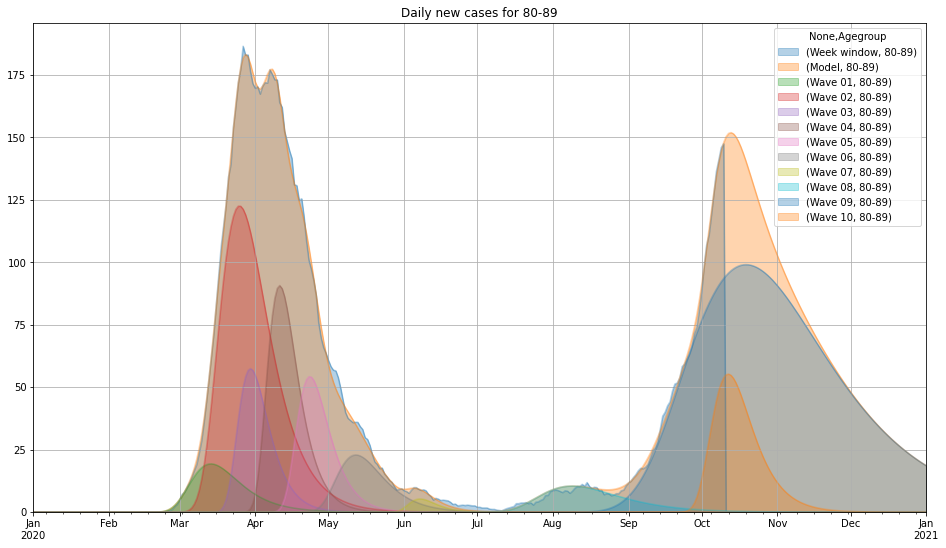

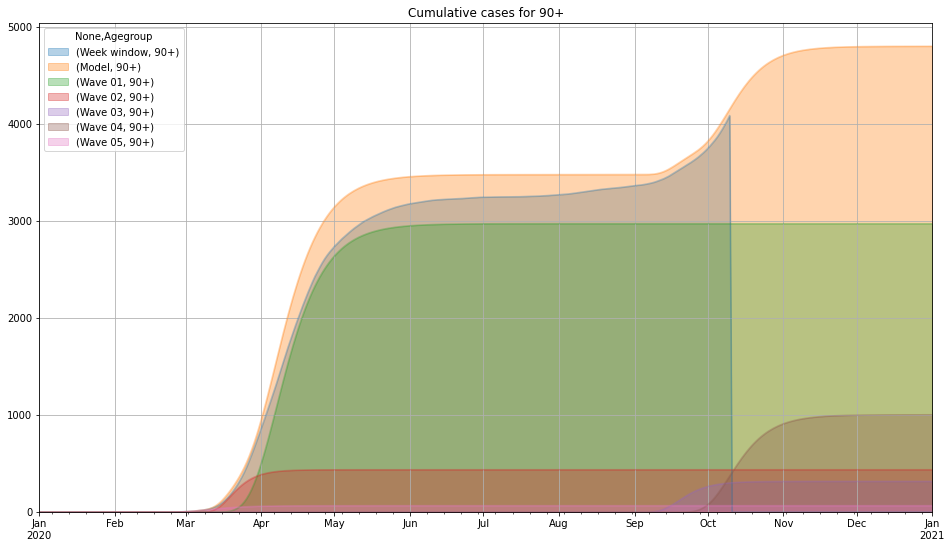

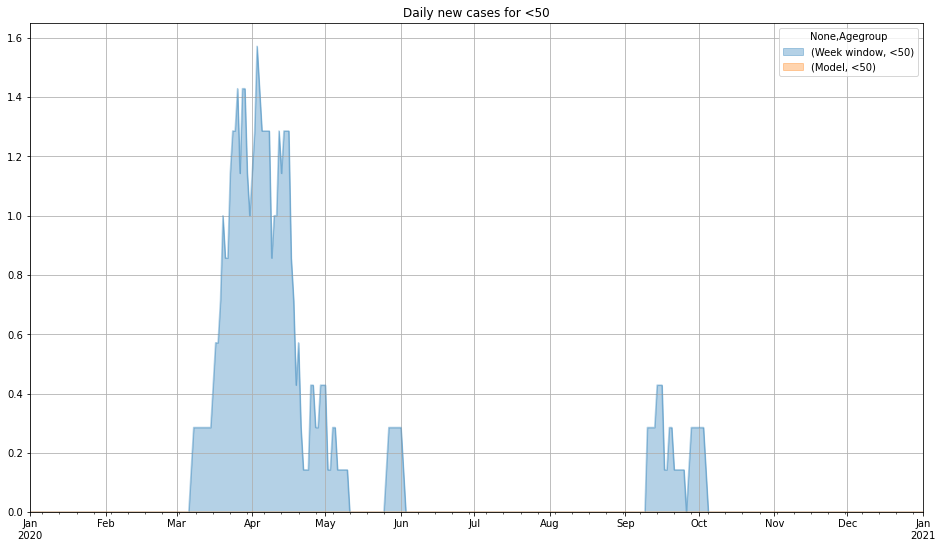

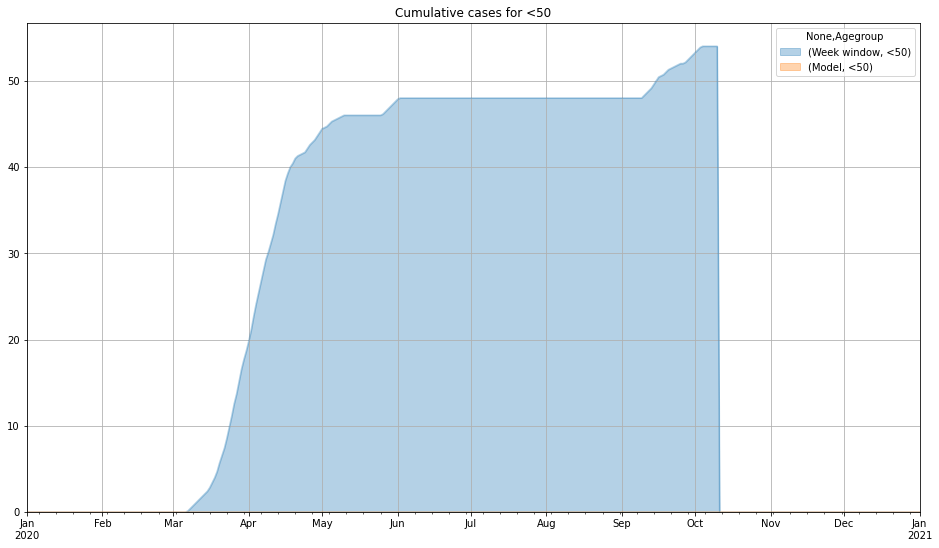

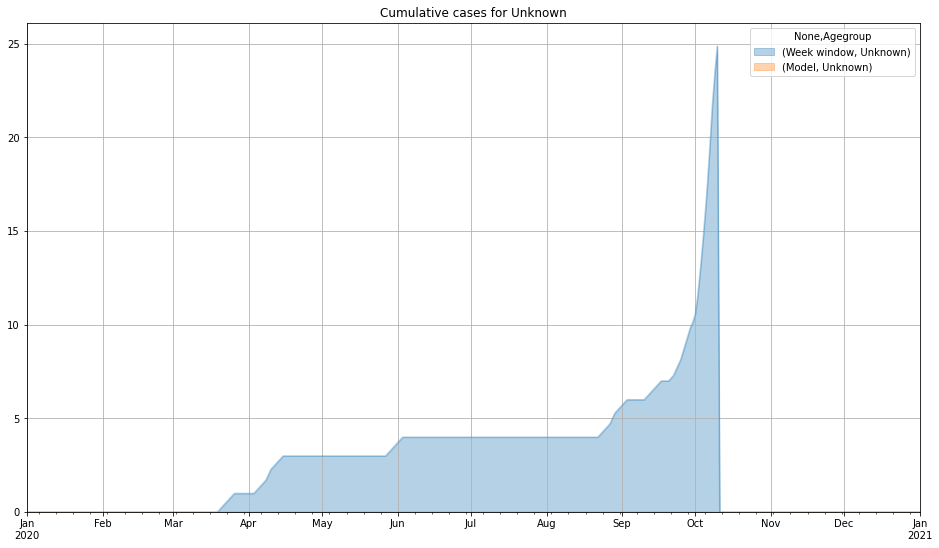

In [12]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in regions:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -0.5) &
                          (df_pred['linear'] > -4.5)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -1/33) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200101':'20210101'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+region)

        df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+region)

In [13]:
df_geo.reset_index(inplace=True)

In [14]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out.columns = (['date', 'type', 'location', 'value'])
df_out.to_csv('zzcorggdage.csv')

Keep exploring! Stay home, wash your hands, keep your distance.